In [1]:
#package installation
! pip install pandas numpy matplotlib seaborn openpyxl
! pip install matplotlib seaborn
! pip install pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from sklearn.preprocessing import StandardScaler
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## Read dataset

In [19]:
# CSV Files
reviews_df = pd.read_csv("../../data/all_countries_reviews.csv")
currency_df = pd.read_csv("../../data/southeast_asia_currency_monthly_avg.csv")
reddit_df = pd.read_csv("../../data/merged_reddit_data.csv")
final_df = pd.read_csv("final_df.csv")
processed_df = pd.read_csv("processed_data.csv")

# Excel File
visitors_df = pd.read_excel("../../data/monthly_num_visitors.xlsx")

# JSON Files
with open("../../data/sentiment_analysis(reddit).json", "r") as f:
    reddit_sentiment = json.load(f)
with open("../../data/sentiment_analysis_instagram_timed.json", "r") as f:
    instagram_sentiment = json.load(f)

## EDA on raw instagram dataset

In [20]:
instagram_sentiment = pd.DataFrame(instagram_sentiment)
instagram_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   caption          4601 non-null   object 
 1   comment_count    4601 non-null   int64  
 2   date             4601 non-null   object 
 3   like_count       4601 non-null   int64  
 4   play_count       4601 non-null   int64  
 5   country          4601 non-null   object 
 6   date_only        4601 non-null   object 
 7   time_only        4601 non-null   object 
 8   month            4601 non-null   int64  
 9   cleaned_caption  4601 non-null   object 
 10  language         4601 non-null   object 
 11  sentiment_score  4601 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 431.5+ KB


In [21]:
instagram_sentiment.describe()

,comment_count,like_count,play_count,month,sentiment_score
count,4601.000000,4601.000000,4.601000e+03,4601.000000,4601.000000
mean,37.266899,1724.000435,3.352524e+04,6.303630,0.456375
std,110.126814,7423.276656,2.803476e+05,3.533468,0.439375
min,0.000000,0.000000,0.000000e+00,1.000000,-0.991900
25%,2.000000,14.000000,0.000000e+00,3.000000,0.000000
50%,11.000000,535.000000,0.000000e+00,6.000000,0.557400
75%,35.000000,1159.000000,7.918000e+03,9.000000,0.877900
max,2537.000000,241372.000000,1.251200e+07,12.000000,0.999200


In [22]:
instagram_sentiment.head()

,caption,comment_count,date,like_count,play_count,country,date_only,time_only,month,cleaned_caption,language,sentiment_score
0,"Bandar Seri Begawan, the capital of the tiny o...",182,2025-01-05T21:20:35.000Z,3569,0,brunei,2025-01-05T00:00:00.000,21:20:35,1,"Bandar Seri Begawan, the capital of the tiny o...",en,0.9100
1,"Jerudong Park, Brunei, new year's eve 1996.\n\...",1,2024-08-08T04:37:02.000Z,103,0,brunei,2024-08-08T00:00:00.000,04:37:02,8,"Jerudong Park, Brunei, new years eve 1996. Mic...",en,0.0000
2,First time seeing a Unimog and it was quite th...,45,2023-08-24T16:36:23.000Z,635,0,brunei,2023-08-24T00:00:00.000,16:36:23,8,First time seeing a Unimog and it was quite th...,en,0.9792
3,Flowers are always the way to a woman’s heart!...,0,2024-05-14T05:27:27.000Z,3,217,brunei,2024-05-14T00:00:00.000,05:27:27,5,Flowers are always the way to a womans heart! ...,en,0.7712
4,"Hello, Brunei! My 69th country.\n\nUnsurprisin...",45,2025-02-06T16:54:56.000Z,2624,0,brunei,2025-02-06T00:00:00.000,16:54:56,2,"Hello, Brunei! My 69th country. Unsurprising f...",en,0.8619


To study the quality of sentiment data, we aggregated the average sentiment_score by country and month. 

In [23]:
# capitalise the first letter of countries
instagram_sentiment["country"] = instagram_sentiment["country"].str.title()

#change month_year format to align with other datasets
instagram_sentiment['date'] = pd.to_datetime(instagram_sentiment['date'], errors='coerce')
instagram_sentiment['month_year'] = instagram_sentiment['date'].dt.strftime('%Y-%m')

#agggregate sentiment score
ig_sentiment = instagram_sentiment.groupby(
    ["country", "month_year"]
)["sentiment_score"].mean().reset_index()
ig_sentiment.columns = ["country", "month_year", "instagram_sentiment"]
ig_sentiment['month_year'] = pd.to_datetime(ig_sentiment['month_year'])
ig_sentiment = ig_sentiment[
    ig_sentiment['month_year'].between('2022-01-01', '2025-01-01')
]
ig_sentiment.head(5)

,country,month_year,instagram_sentiment
0,Brunei,2022-01-01,0.621856
1,Brunei,2022-02-01,0.647714
2,Brunei,2022-03-01,0.605562
3,Brunei,2022-04-01,0.533040
4,Brunei,2022-05-01,0.667885


To visualise the distribution of sentiment across the entire dataset, we plot a histogram

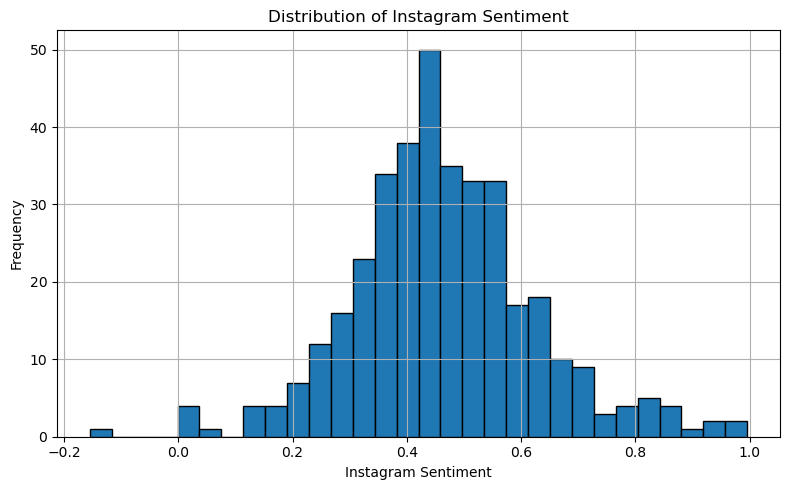

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(ig_sentiment['instagram_sentiment'], bins=30, edgecolor='black')
plt.title('Distribution of Instagram Sentiment')
plt.xlabel('Instagram Sentiment')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

## EDA on raw reddit dataset

In [25]:
reddit_df = pd.DataFrame(reddit_sentiment)
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   submission_id        819 non-null    object 
 1   author               802 non-null    object 
 2   created_utc          819 non-null    object 
 3   month_year           819 non-null    object 
 4   name                 819 non-null    object 
 5   num_comments         819 non-null    int64  
 6   score                819 non-null    int64  
 7   selftext             819 non-null    object 
 8   subreddit_name       819 non-null    object 
 9   title                819 non-null    object 
 10  upvote_ratio         819 non-null    float64
 11  mentioned_countries  819 non-null    object 
 12  mentioned_cities     819 non-null    object 
 13  date_only            819 non-null    object 
 14  time_only            819 non-null    object 
 15  month                819 non-null    int

In [26]:
reddit_df.head()

,submission_id,author,created_utc,month_year,name,num_comments,score,selftext,subreddit_name,title,upvote_ratio,mentioned_countries,mentioned_cities,date_only,time_only,month,language,cleaned_caption,sentiment_score
0,1jjuq8t,Stock_Rabbit_1901,2024-04-09T12:57:21.441Z,04-2024,t3_1jjuq8t,5,6,I’m going to China in May to visit a manufactu...,travel,"China trip, advice for 6 nights",1.00,china,"beijing, hangzhou, shanghai",2024-04-09T00:00:00.000,12:57:21.441380,4,en,Im going to China in May to visit a manufactur...,0.9627
1,1j62q8v,OkMasterpiece260,2022-04-27T16:00:12.938Z,04-2022,t3_1j62q8v,6,0,Hey backpackers! My name is Caitlin and I’m cu...,backpacking,Come to Thailand with me!!,0.09,"singapore, thailand",singapore,2022-04-27T00:00:00.000,16:00:12.938550,4,en,Hey backpackers! My name is Caitlin and Im cur...,0.9905
2,1jcrmy9,Extension-Driver-136,2024-12-25T09:13:10.947Z,12-2024,t3_1jcrmy9,23,13,"Hello everyone, \n\nI would like some help ple...",solotravel,Budgeting for Gap Year in SEA - Help please,0.84,"vietnam, malaysia, thailand, indonesia, nepal,...",,2024-12-25T00:00:00.000,09:13:10.947906,12,en,"Hello everyone, I would like some help please!...",0.8974
3,1jeujdu,bonuccigang,2023-07-18T17:12:01.071Z,07-2023,t3_1jeujdu,0,1,"Hi all, I’m a 24 year old M looking to take a ...",solotravel,"Tips, advice and recommendations for my trip t...",0.67,"singapore, malaysia, thailand","kuala lumpur, singapore",2023-07-18T00:00:00.000,17:12:01.071821,7,en,"Hi all, Im a 24 year old M looking to take a 3...",0.9982
4,1jcv2ig,RubAdministrative515,2024-01-11T18:19:20.407Z,01-2024,t3_1jcv2ig,40,28,I am 19 and never left the country (USA). I a...,solotravel,Am I too ambitious for a first international t...,0.79,"china, japan, south_korea",,2024-01-11T00:00:00.000,18:19:20.407500,1,en,I am 19 and never left the country USA. I am p...,0.9021


In [27]:
reddit_df.describe()

,num_comments,score,upvote_ratio,month,sentiment_score
count,819.000000,819.000000,819.000000,819.000000,819.000000
mean,20.062271,42.112332,0.730598,6.036630,0.721845
std,49.666440,295.396869,0.243513,3.532057,0.450683
min,0.000000,0.000000,0.050000,1.000000,-0.962800
25%,3.000000,1.000000,0.540000,3.000000,0.707300
50%,8.000000,2.000000,0.750000,6.000000,0.928700
75%,22.000000,6.000000,1.000000,9.000000,0.981200
max,868.000000,5298.000000,1.000000,12.000000,0.999200


Similarly for reddit's sentiment data, we will inspect the distribution of the aggregated average value

/var/folders/85/3q25ml057m51x2d6fx8s4w740000gn/T/ipykernel_36172/4113853256.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  avg_sentiment['month_year'] = pd.to_datetime(avg_sentiment['month_year'])


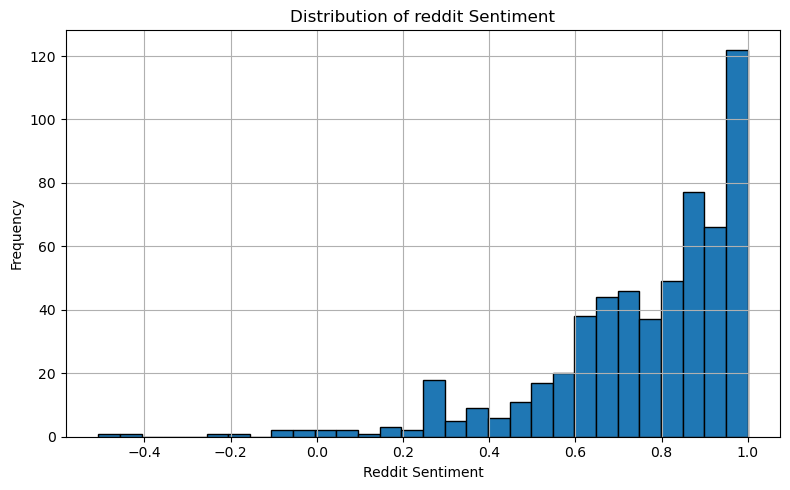

In [28]:
reddit_df["mentioned_countries"] = reddit_df["mentioned_countries"].apply(
    lambda x: [c.strip().lower() for c in x.split(",")] if isinstance(x, str) else x
)
## Explode the list so as to aggregate based on individual countries
reddit_df_exploded = reddit_df.explode("mentioned_countries")

## aggregate individual country's average sentiment score
avg_sentiment = reddit_df_exploded.groupby(
    ["mentioned_countries", "month_year"]
)["sentiment_score"].mean().reset_index()
avg_sentiment.columns = ["country", "month_year", "reddit_sentiment"]
avg_sentiment['month_year'] = pd.to_datetime(avg_sentiment['month_year'])

plt.figure(figsize=(8, 5))
plt.hist(avg_sentiment['reddit_sentiment'], bins=30, edgecolor='black')
plt.title('Distribution of reddit Sentiment')
plt.xlabel('Reddit Sentiment')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

Due to the small sample size of the first Reddit dataset, we conducted a second round of scraping to broaden the temporal and topical coverage of posts—thereby improving the representativeness of our sample, reducing sampling bias, and increasing the statistical power and external validity of our subsequent analyses.

In [29]:
reddit_df = pd.read_csv("../../data/merged_reddit_data.csv")
reddit_df = pd.DataFrame(reddit_df)
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467299 entries, 0 to 467298
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   post_id            467299 non-null  object 
 1   created_at         467299 non-null  object 
 2   title              6239 non-null    object 
 3   text               465787 non-null  object 
 4   author             427405 non-null  object 
 5   score              467299 non-null  int64  
 6   upvote_ratio       6239 non-null    float64
 7   num_comments       6239 non-null    float64
 8   subreddit          467299 non-null  object 
 9   source             467299 non-null  object 
 10  content_type       467299 non-null  object 
 11  keyword            467299 non-null  object 
 12  vader_compound     467299 non-null  float64
 13  vader_pos          467299 non-null  float64
 14  vader_neu          467299 non-null  float64
 15  vader_neg          467299 non-null  float64
 16  te

In [30]:
reddit_df = reddit_df[['created_at', 'score','upvote_ratio', 'num_comments','vader_compound','country']]
reddit_df.head()

,created_at,score,upvote_ratio,num_comments,vader_compound,country
0,09/20/24,12,0.94,2.0,0.0000,Brunei
1,09/20/24,3,NaN,NaN,0.6462,Brunei
2,09/20/24,1,NaN,NaN,0.0000,Brunei
3,04/19/22,12,0.85,1.0,0.7430,Brunei
4,04/19/22,3,NaN,NaN,0.8271,Brunei


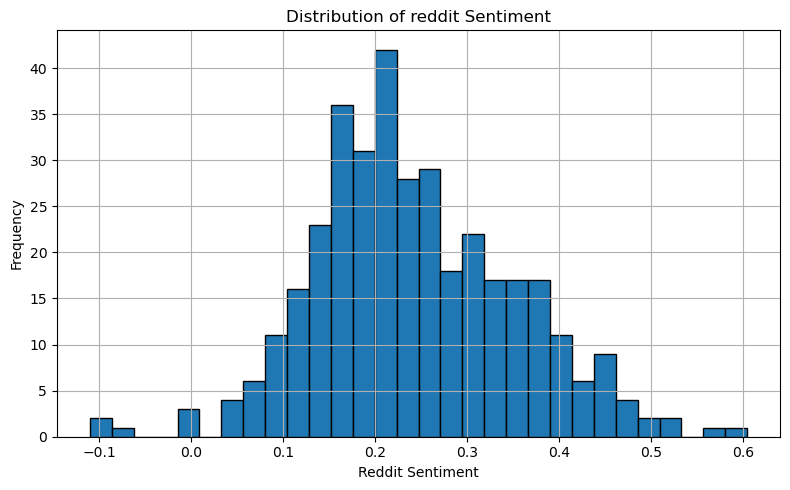

In [31]:
reddit_df['month_year'] = pd.to_datetime(reddit_df['created_at'], format='%m/%d/%y').dt.strftime('%Y-%m')
avg_sentiment = reddit_df.groupby(
    ["country", "month_year"]
)["vader_compound"].mean().reset_index()
avg_sentiment.columns = ["country", "month_year", "reddit_sentiment"]
avg_sentiment['month_year'] = pd.to_datetime(avg_sentiment['month_year'])

plt.figure(figsize=(8, 5))
plt.hist(avg_sentiment['reddit_sentiment'], bins=30, edgecolor='black')
plt.title('Distribution of reddit Sentiment')
plt.xlabel('Reddit Sentiment')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

## EDA on raw trip advisor data

In [32]:
reviews_df = pd.DataFrame(reviews_df)
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51853 entries, 0 to 51852
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            51850 non-null  object 
 1   text             51850 non-null  object 
 2   rating           51850 non-null  float64
 3   trip_date        51850 non-null  object 
 4   trip_category    51850 non-null  object 
 5   attraction_name  51850 non-null  object 
 6   attraction_url   51850 non-null  object 
 7   country          51850 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.2+ MB


In [33]:
reviews_df.head()

,title,text,rating,trip_date,trip_category,attraction_name,attraction_url,country
0,need many improvement!!!!,this attraction is on the Southbank of Brunei ...,3.0,Mar 2025,Solo,Kampong Ayer - Venice of East,https://www.tripadvisor.com/Attraction_Review-...,Brunei
1,Largest water village in the world?,It’s reportedly the largest village on built o...,4.0,Feb 2025,Solo,Kampong Ayer - Venice of East,https://www.tripadvisor.com/Attraction_Review-...,Brunei
2,A Living Heritage on Water,A boat tour around Kampong Ayer typically last...,5.0,Jan 2025,Solo,Kampong Ayer - Venice of East,https://www.tripadvisor.com/Attraction_Review-...,Brunei
3,A stilted experience. Worth a peek,We enjoyed our time seeing a different way of ...,4.0,Jul 2024,Friends,Kampong Ayer - Venice of East,https://www.tripadvisor.com/Attraction_Review-...,Brunei
4,Kampong Ayer walking experience,Very nice experience of village on water as it...,5.0,May 2024,Solo,Kampong Ayer - Venice of East,https://www.tripadvisor.com/Attraction_Review-...,Brunei


In [34]:
reviews_df.describe()

,rating
count,51850.000000
mean,4.595217
std,0.788723
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [35]:
# Convert trip_date to datetime and extract month-year
reviews_df["trip_date"] = pd.to_datetime(reviews_df["trip_date"], errors="coerce")
reviews_df["month_year"] = reviews_df["trip_date"].dt.strftime("%Y-%m")
columns_to_keep = [
    "month_year",
    "country",
    "rating"
]
reviews_df = reviews_df[columns_to_keep]

# aggregate to find average monthly rating
review_agg = reviews_df.groupby(["country", "month_year"])["rating"].mean().reset_index()
review_agg = review_agg.rename(columns={"rating": "trip_advisor_rating"})
review_agg['month_year'] = pd.to_datetime(review_agg['month_year'])
review_agg.head(5)

/var/folders/85/3q25ml057m51x2d6fx8s4w740000gn/T/ipykernel_36172/2329986590.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  reviews_df["trip_date"] = pd.to_datetime(reviews_df["trip_date"], errors="coerce")


,country,month_year,trip_advisor_rating
0,Brunei,2015-09-01,4.5
1,Brunei,2015-10-01,5.0
2,Brunei,2016-01-01,5.0
3,Brunei,2016-02-01,5.0
4,Brunei,2016-04-01,4.5


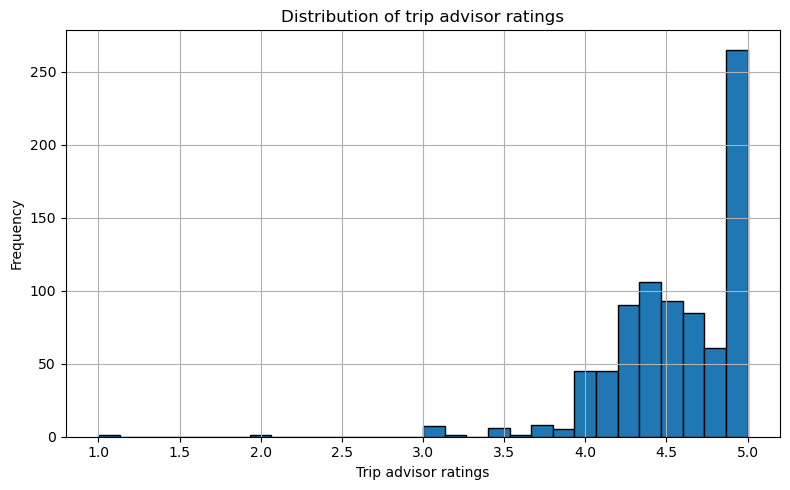

In [36]:
plt.figure(figsize=(8, 5))
plt.hist(review_agg['trip_advisor_rating'], bins=30, edgecolor='black')
plt.title('Distribution of trip advisor ratings')
plt.xlabel('Trip advisor ratings')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

## EDA on raw exchange rate dataset

In [57]:
currency_df = pd.DataFrame(currency_df)
currency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YearMonth    390 non-null    object 
 1   Currency     390 non-null    object 
 2   AverageRate  390 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.3+ KB


In [58]:
currency_df.head()

,YearMonth,Currency,AverageRate
0,2022-01,BND,1.351418
1,2022-01,IDR,14327.056094
2,2022-01,KHR,4072.629258
3,2022-01,LAK,11272.253421
4,2022-01,MMK,1777.280733


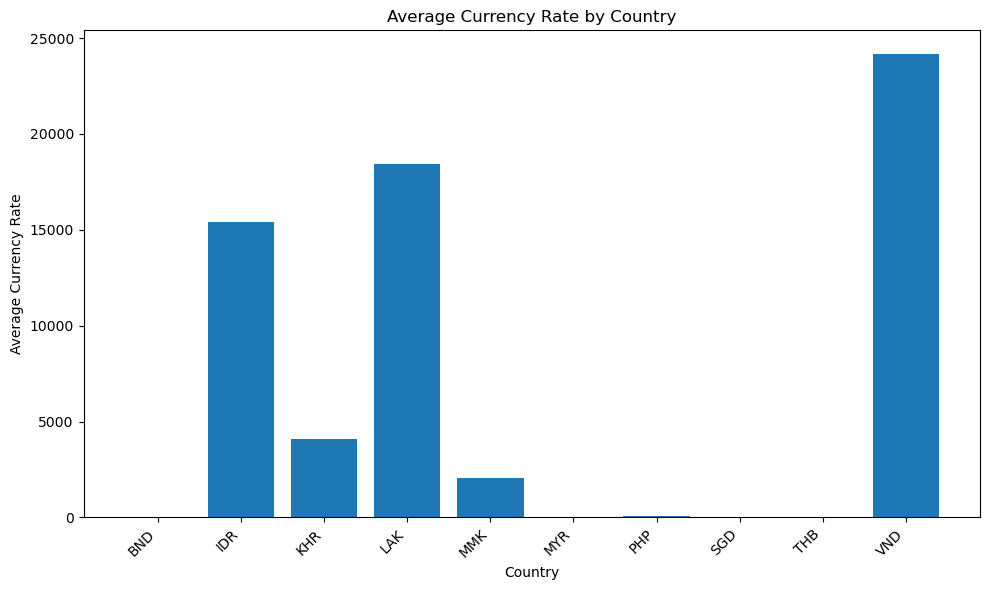

In [59]:
avg_rates = currency_df.groupby('Currency')['AverageRate'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_rates['Currency'], avg_rates['AverageRate'])
plt.xlabel('Country')
plt.ylabel('Average Currency Rate')
plt.title('Average Currency Rate by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [61]:
unique_codes = currency_df["Currency"].unique()
print(unique_codes)

['BND' 'IDR' 'KHR' 'LAK' 'MMK' 'MYR' 'PHP' 'SGD' 'THB' 'VND']


## EDA on raw #visitor dataset

In [63]:
visitors_df = pd.DataFrame(visitors_df)
visitors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     363 non-null    object 
 1   month_year  363 non-null    object 
 2   value       363 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.6+ KB


In [64]:
visitors_df.head()

,country,month_year,value
0,Thailand,2022-01,134000.0
1,Thailand,2022-02,153000.0
2,Thailand,2022-03,211000.0
3,Thailand,2022-04,293000.0
4,Thailand,2022-05,521000.0


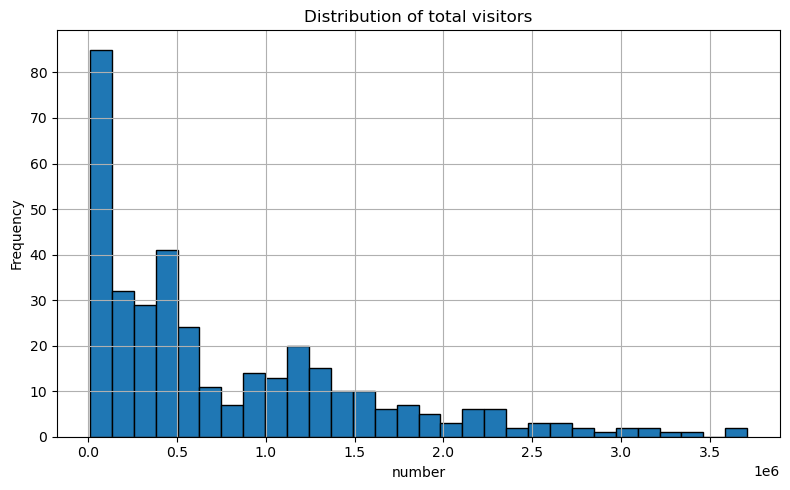

In [65]:
plt.figure(figsize=(8, 5))
plt.hist(visitors_df['value'], bins=30, edgecolor='black')
plt.title('Distribution of total visitors')
plt.xlabel('number')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

## EDA on raw google trend data

In [209]:
processed_df = pd.DataFrame(processed_df)
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                407 non-null    object 
 1   month_year             407 non-null    object 
 2   num_visitors           407 non-null    int64  
 3   ig_sentiment           377 non-null    float64
 4   ig_sentiment_z         377 non-null    float64
 5   reddit_sentiment_z     332 non-null    float64
 6   trip_advisor_rating    377 non-null    float64
 7   log_avg_currency_rate  387 non-null    float64
 8   google_trend_score     397 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 28.7+ KB


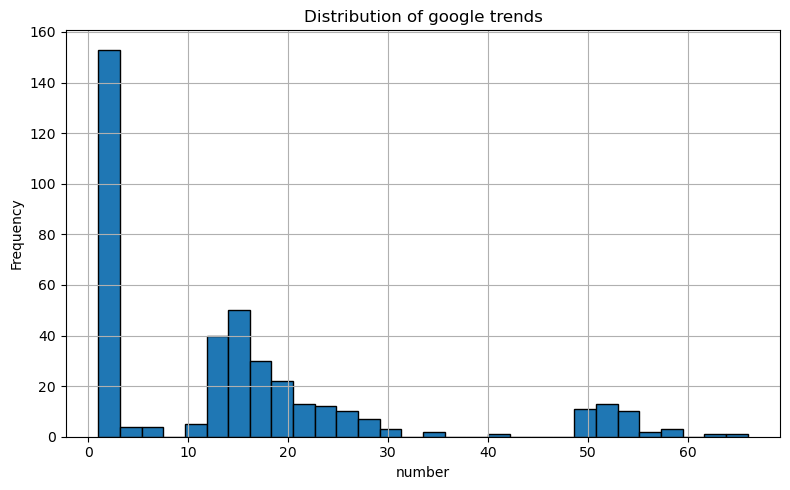

In [210]:
plt.figure(figsize=(8, 5))
plt.hist(processed_df['google_trend_score'], bins=30, edgecolor='black')
plt.title('Distribution of google trends')
plt.xlabel('number')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

## EDA on merged dataset

In [43]:
processed_df = pd.read_csv("processed_data.csv")
processed_df = pd.DataFrame(processed_df)
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     407 non-null    object 
 1   month_year                  407 non-null    object 
 2   num_visitors                407 non-null    int64  
 3   log_visitors                407 non-null    float64
 4   month                       407 non-null    int64  
 5   year                        407 non-null    int64  
 6   is_monsoon_season           407 non-null    int64  
 7   ig_sentiment                377 non-null    float64
 8   ig_sentiment_lag1           369 non-null    float64
 9   ig_sentiment_z              377 non-null    float64
 10  reddit_sentiment_z          332 non-null    float64
 11  reddit_sentiment_lag1       323 non-null    float64
 12  trip_advisor_rating         377 non-null    float64
 13  trip_advisor_rating_lag1    369 non

In [38]:
processed_df.head()

,country,month_year,num_visitors,log_visitors,month,year,is_monsoon_season,ig_sentiment,ig_sentiment_lag1,ig_sentiment_z,reddit_sentiment_z,reddit_sentiment_lag1,trip_advisor_rating,trip_advisor_rating_lag1,log_avg_currency_rate,log_avg_currency_rate_lag1,google_trend_score,google_trend_score_lag1
0,brunei,2022-02,9526,9.161885,2,2022,1,0.741684,0.893029,0.365570,NaN,NaN,4.611111,4.045455,0.853635,0.855019,1.0,1.0
1,brunei,2022-03,9508,9.159994,3,2022,1,0.709663,0.741684,0.261041,1.117336,NaN,4.227273,4.611111,0.858854,0.853635,1.0,1.0
2,brunei,2022-04,16950,9.738082,4,2022,1,0.937762,0.709663,1.005657,NaN,NaN,4.300000,4.227273,0.860752,0.858854,1.0,1.0
3,brunei,2022-05,36487,10.504739,5,2022,0,0.528223,0.937762,-0.331262,1.390960,1.117336,4.454545,4.300000,0.867990,0.860752,1.0,1.0
4,brunei,2022-06,44748,10.708824,6,2022,0,0.515770,0.528223,-0.371913,0.749135,1.390960,4.470588,4.454545,0.869137,0.867990,1.0,1.0


In [39]:
processed_df.describe()

,num_visitors,log_visitors,month,year,is_monsoon_season,ig_sentiment,ig_sentiment_lag1,ig_sentiment_z,reddit_sentiment_z,reddit_sentiment_lag1,trip_advisor_rating,trip_advisor_rating_lag1,log_avg_currency_rate,log_avg_currency_rate_lag1,google_trend_score,google_trend_score_lag1
count,4.070000e+02,407.000000,407.000000,407.000000,407.000000,377.000000,369.000000,377.000000,332.000000,323.000000,377.000000,369.000000,387.000000,379.000000,397.000000,397.000000
mean,8.273766e+05,12.945870,6.110565,2023.250614,0.533170,0.485072,0.487775,-0.002439,0.005872,0.002129,4.580077,4.577833,5.680540,5.663259,14.891688,15.025189
std,8.290221e+05,1.370062,3.456280,1.007897,0.499513,0.303560,0.303628,0.990522,0.981995,0.995637,0.287963,0.289268,3.639305,3.638254,15.507927,15.808972
min,9.508000e+03,9.159994,1.000000,2022.000000,0.000000,-0.501647,-0.501647,-3.486833,-3.108684,-3.108684,3.980000,3.980000,0.831388,0.831388,1.000000,1.000000
25%,1.422995e+05,11.865690,3.000000,2022.000000,0.000000,0.289160,0.289215,-0.659254,-0.730580,-0.737640,4.342697,4.340659,1.703152,1.703152,2.000000,1.000000
50%,5.060000e+05,13.134294,6.000000,2023.000000,1.000000,0.497516,0.504805,0.120021,0.070213,0.040878,4.470588,4.470930,7.483402,7.482722,13.000000,13.000000
75%,1.250000e+06,14.038655,9.000000,2024.000000,1.000000,0.732746,0.737098,0.758311,0.706285,0.724718,4.945312,4.945312,9.624773,9.618871,19.000000,19.000000
max,3.900000e+06,15.176487,12.000000,2025.000000,1.000000,0.995050,0.995050,2.010440,2.330564,2.330564,5.000000,5.000000,10.147797,10.145076,66.000000,71.000000


In [40]:
processed_df = processed_df[[
    'trip_advisor_rating',
    'ig_sentiment',
    'google_trend_score',
    'num_visitors',
    'log_avg_currency_rate',
    'reddit_sentiment_z'
]]
processed_df['avg_currency_rate'] = processed_df['log_avg_currency_rate']
processed_df['reddit_sentiment'] = processed_df['reddit_sentiment_z']
processed_df = processed_df.drop(columns=['log_avg_currency_rate', 'reddit_sentiment_z'])


In [41]:
n = len(processed_df)
missing_cnt = processed_df.isnull().sum()
missing_pct = missing_cnt / n * 100
missing_table = pd.DataFrame({
    'missing_count': missing_cnt,
    'missing%': missing_pct
}).sort_values('missing%', ascending=False)
missing_table.head(19)


,missing_count,missing%
reddit_sentiment,75,18.427518
trip_advisor_rating,30,7.371007
ig_sentiment,30,7.371007
avg_currency_rate,20,4.914005
google_trend_score,10,2.457002
num_visitors,0,0.000000


In [44]:
print(processed_df['country'].value_counts(), '\n')

country
cambodia       41
indonesia      41
laos           41
malaysia       41
myanmar        41
singapore      41
thailand       41
vietnam        41
philippines    40
brunei         39
Name: count, dtype: int64 



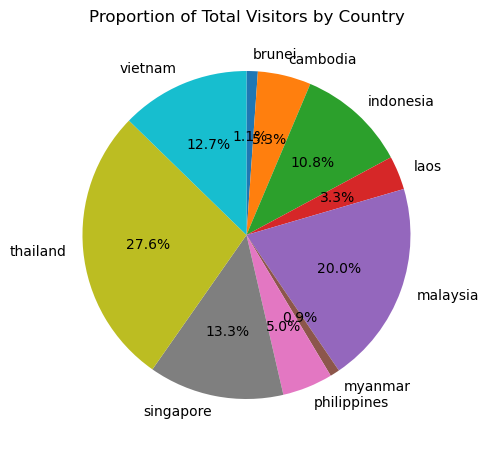

In [132]:
import matplotlib.pyplot as plt

# 1. Sum visitors per country
visitors_by_country = processed_df.groupby('country')['num_visitors'].sum()

# 2. Plot pie chart
plt.figure(figsize=(5,5))
visitors_by_country.plot(
    kind='pie',
    autopct='%1.1f%%',    # show percentages
    startangle=90,        # rotate so first slice starts at 12 o'clock
    counterclock=False    # slices go clockwise
)
plt.ylabel('')            # hide the y‑label “num_visitors”
plt.title('Proportion of Total Visitors by Country')
plt.tight_layout()
plt.show()


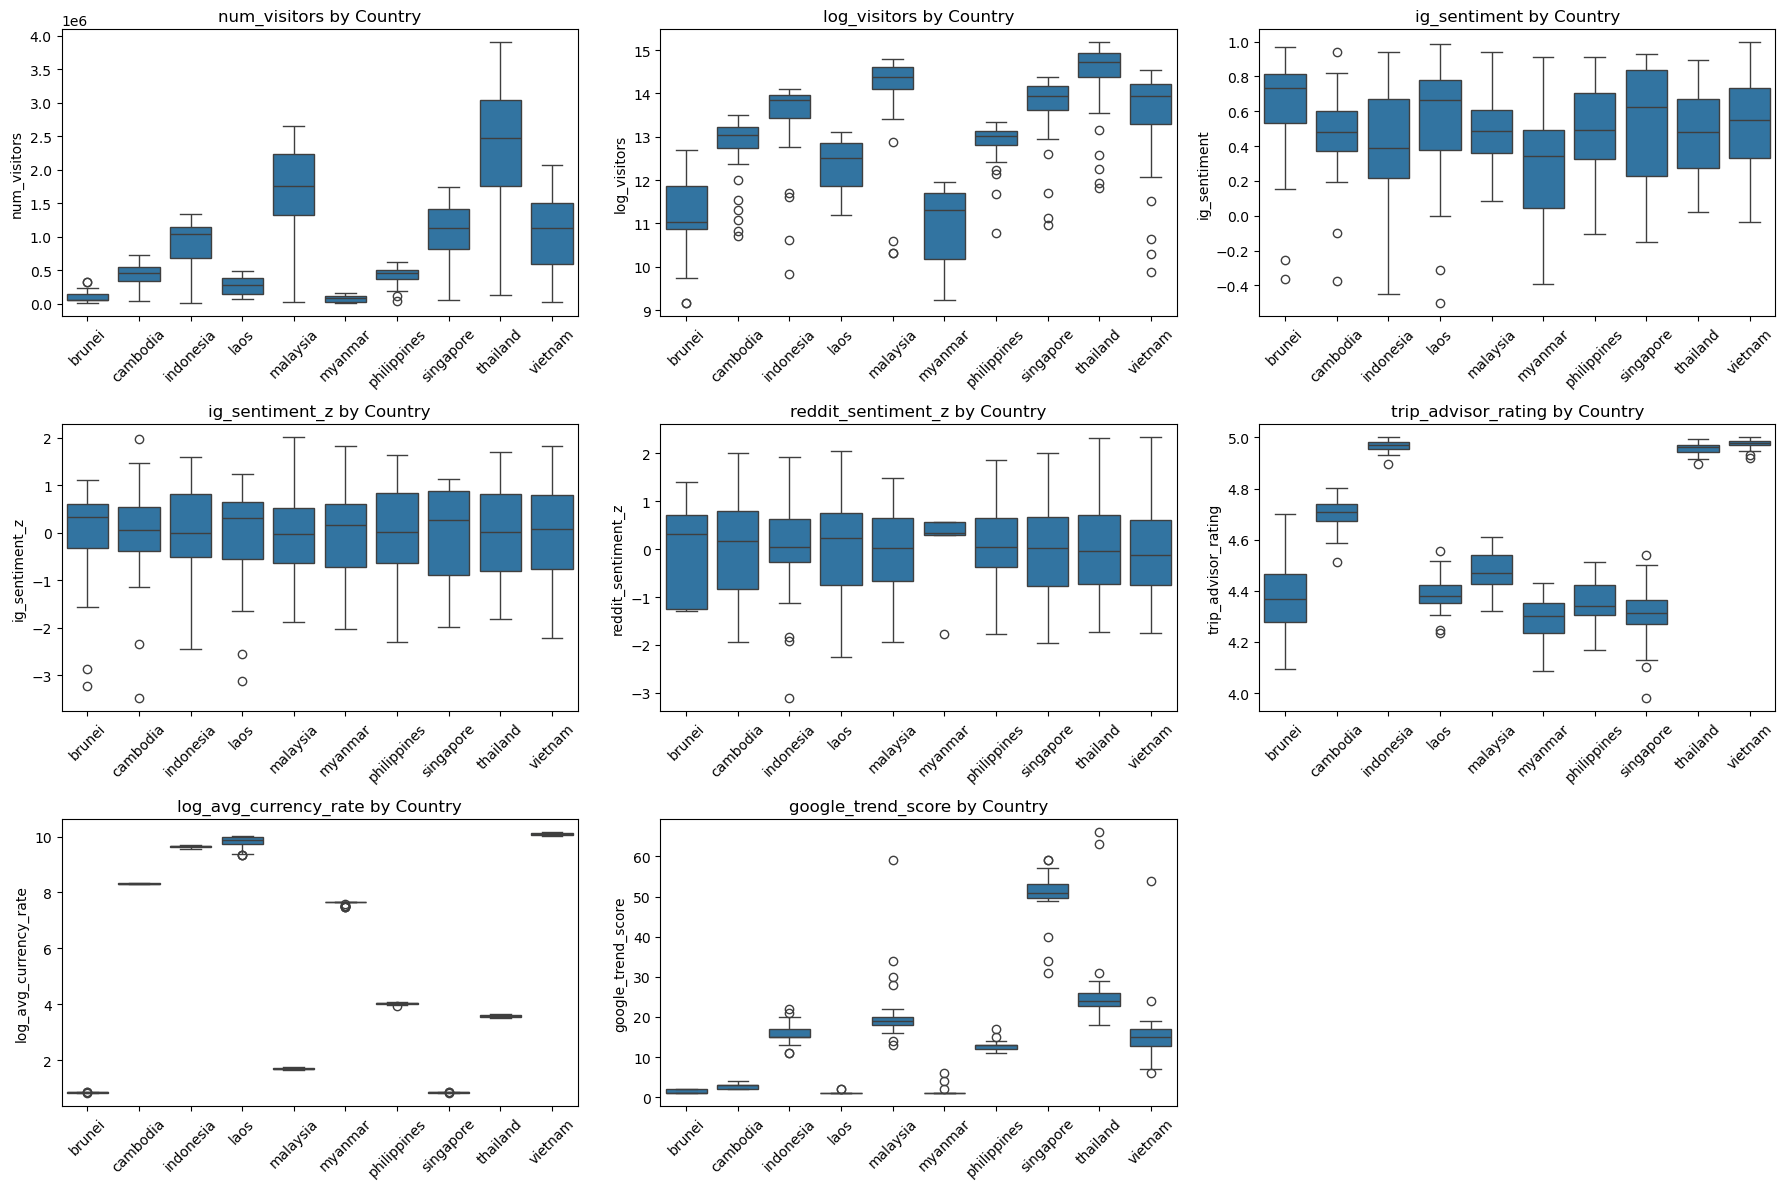

In [142]:
num_cols = processed_df.select_dtypes(include=['int64','float64']).columns.tolist()
n = len(num_cols)
n_cols = 3
n_rows = math.ceil(n / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4), sharey=False)
axes = axes.flatten()
for ax, col in zip(axes, num_cols):
    sns.boxplot(
        x='country',
        y=col,
        data=processed_df,
        ax=ax
    )
    ax.set_title(f'{col} by Country')
    ax.set_xlabel('')
    ax.set_ylabel(col)
    ax.tick_params(axis='x', rotation=45)
for ax in axes[n:]:
    ax.axis('off')
plt.tight_layout()
plt.show()


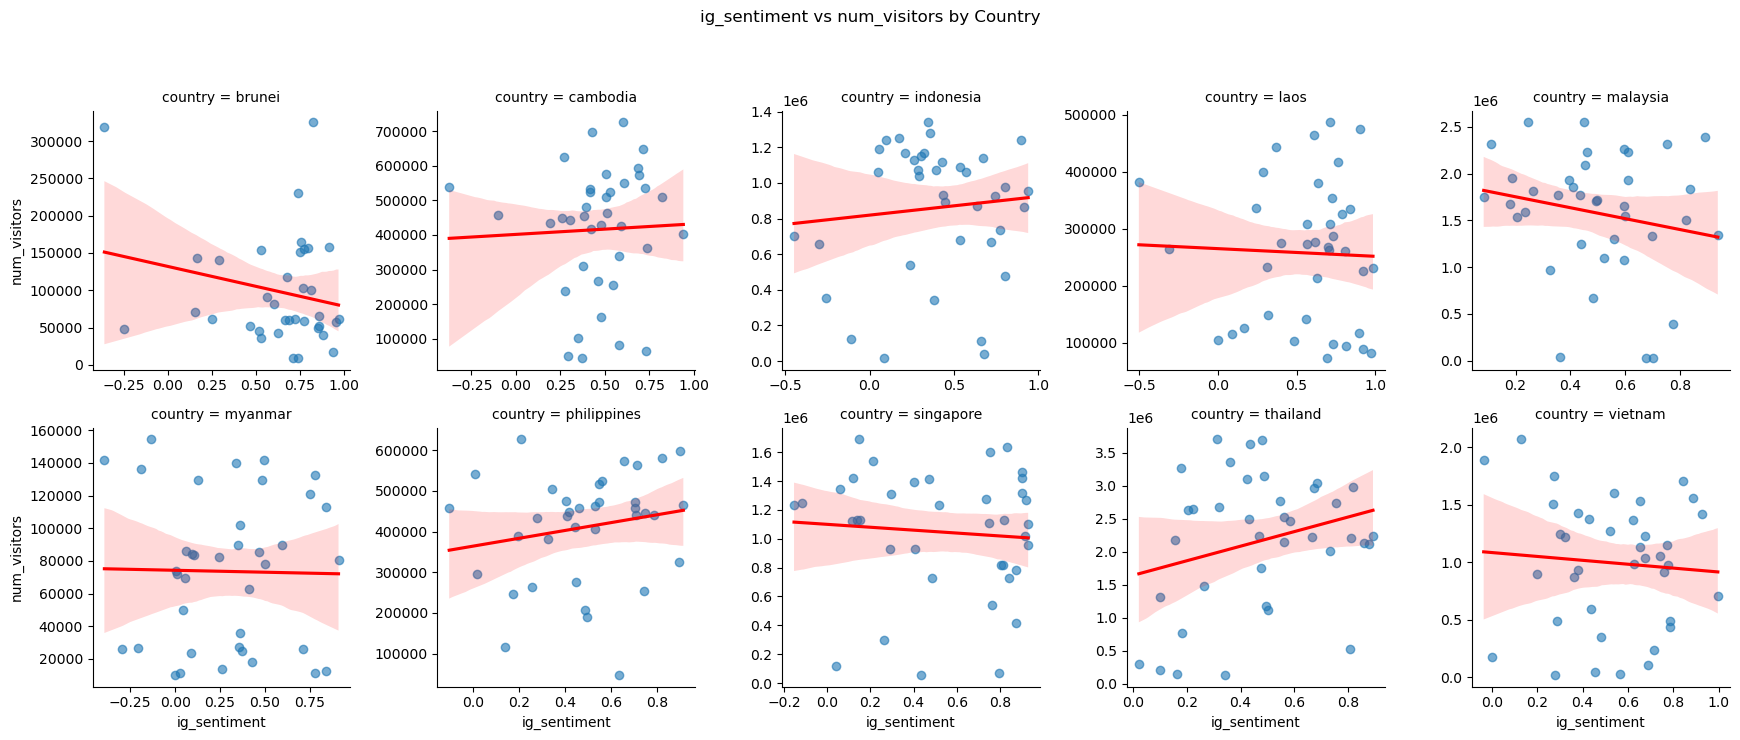

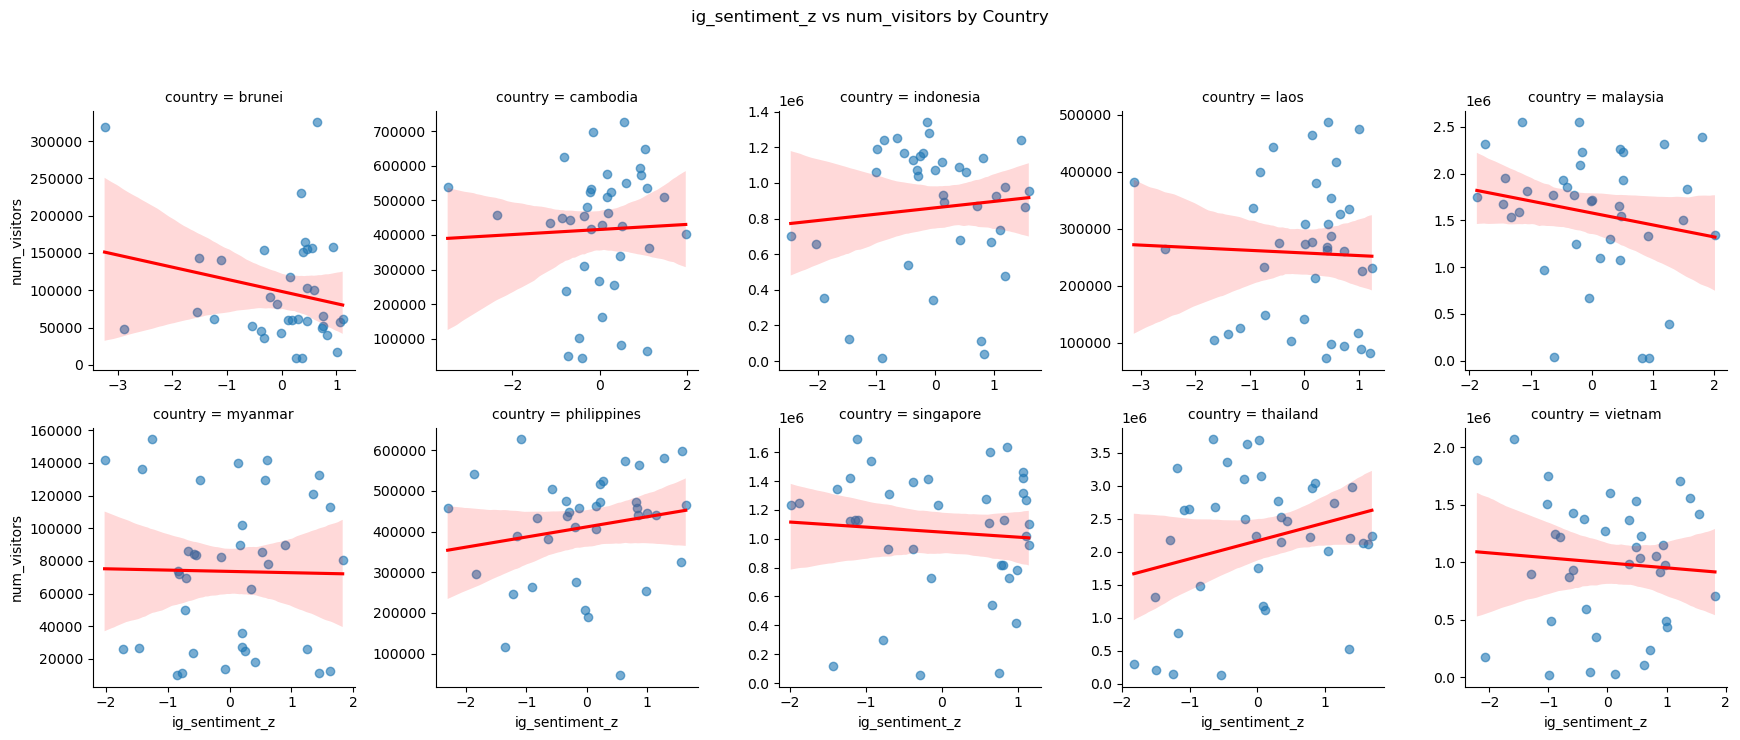

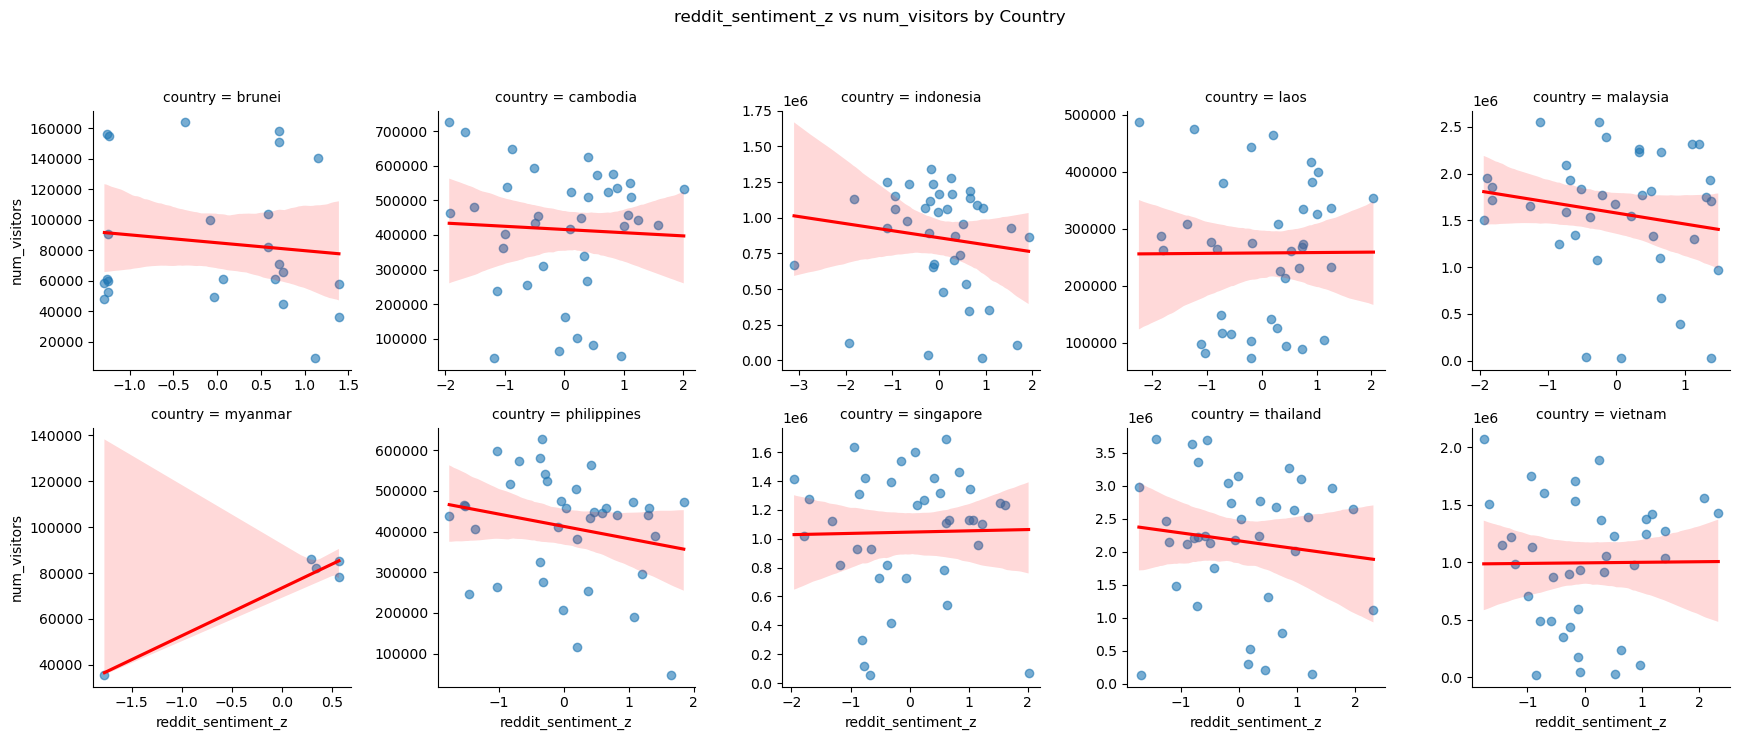

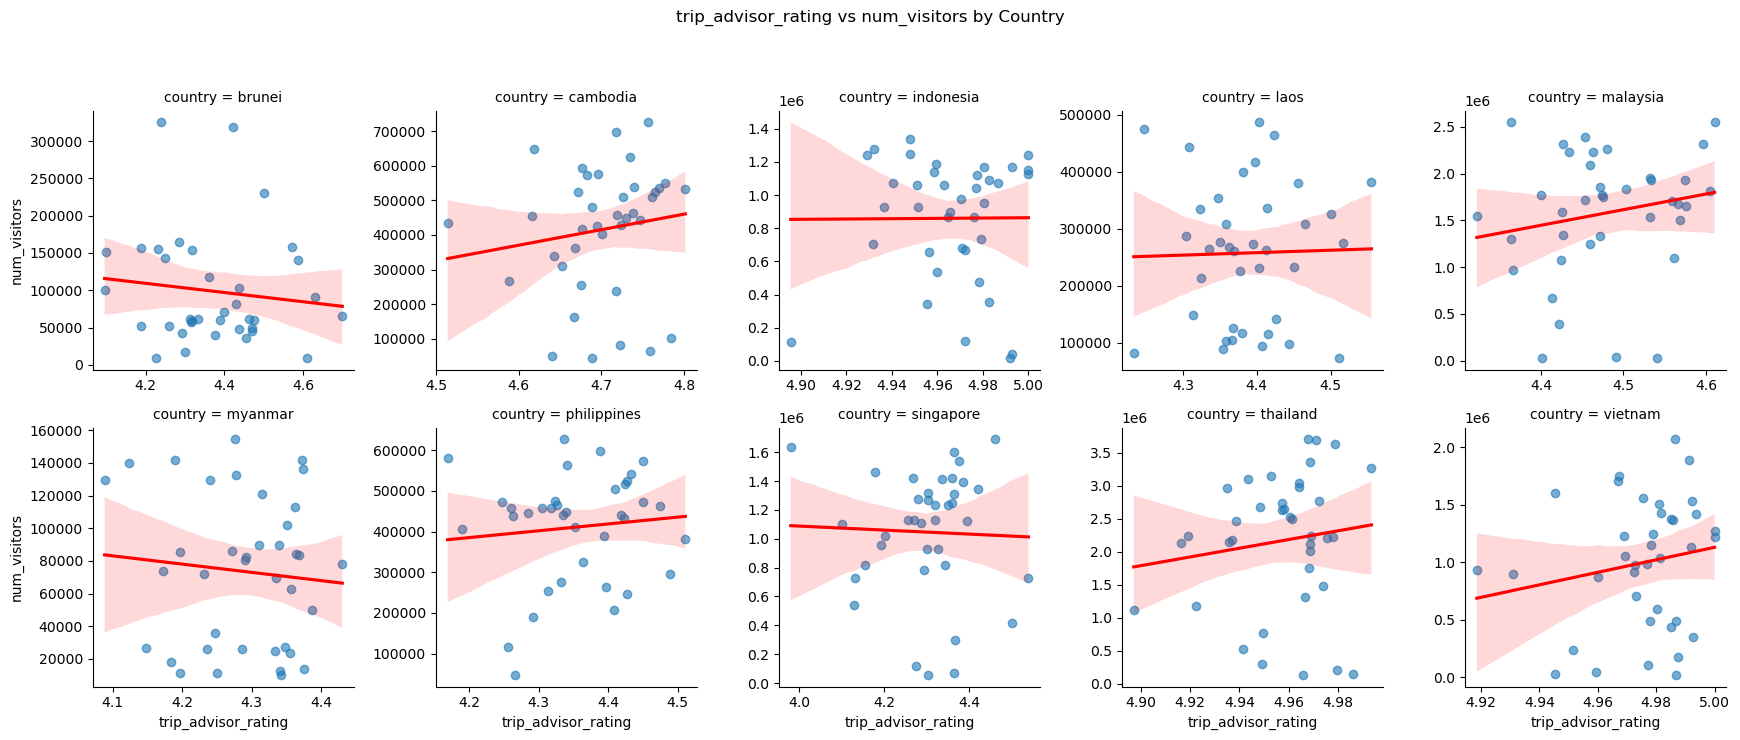

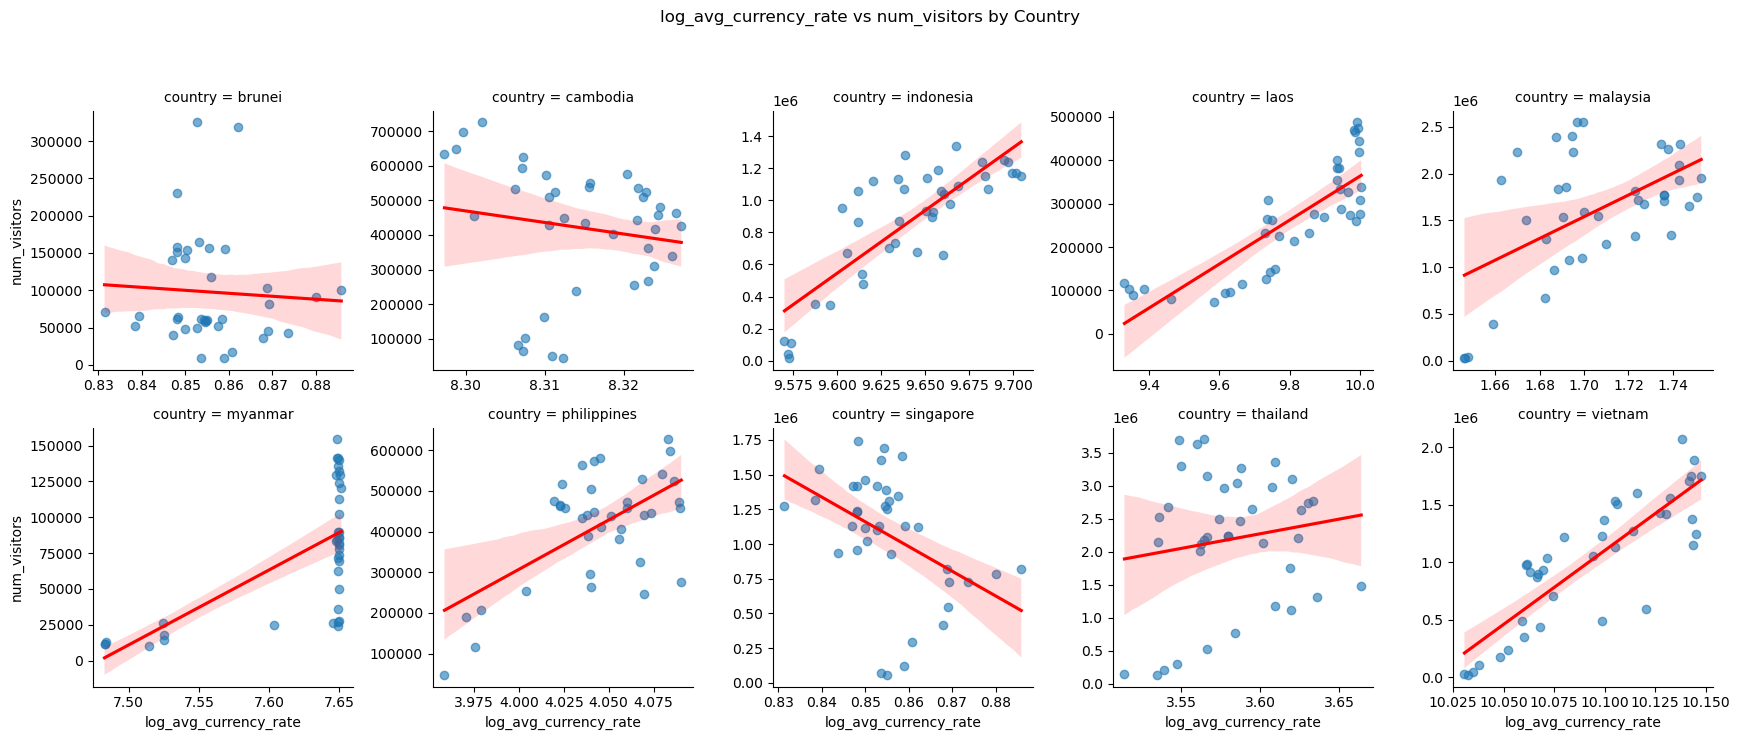

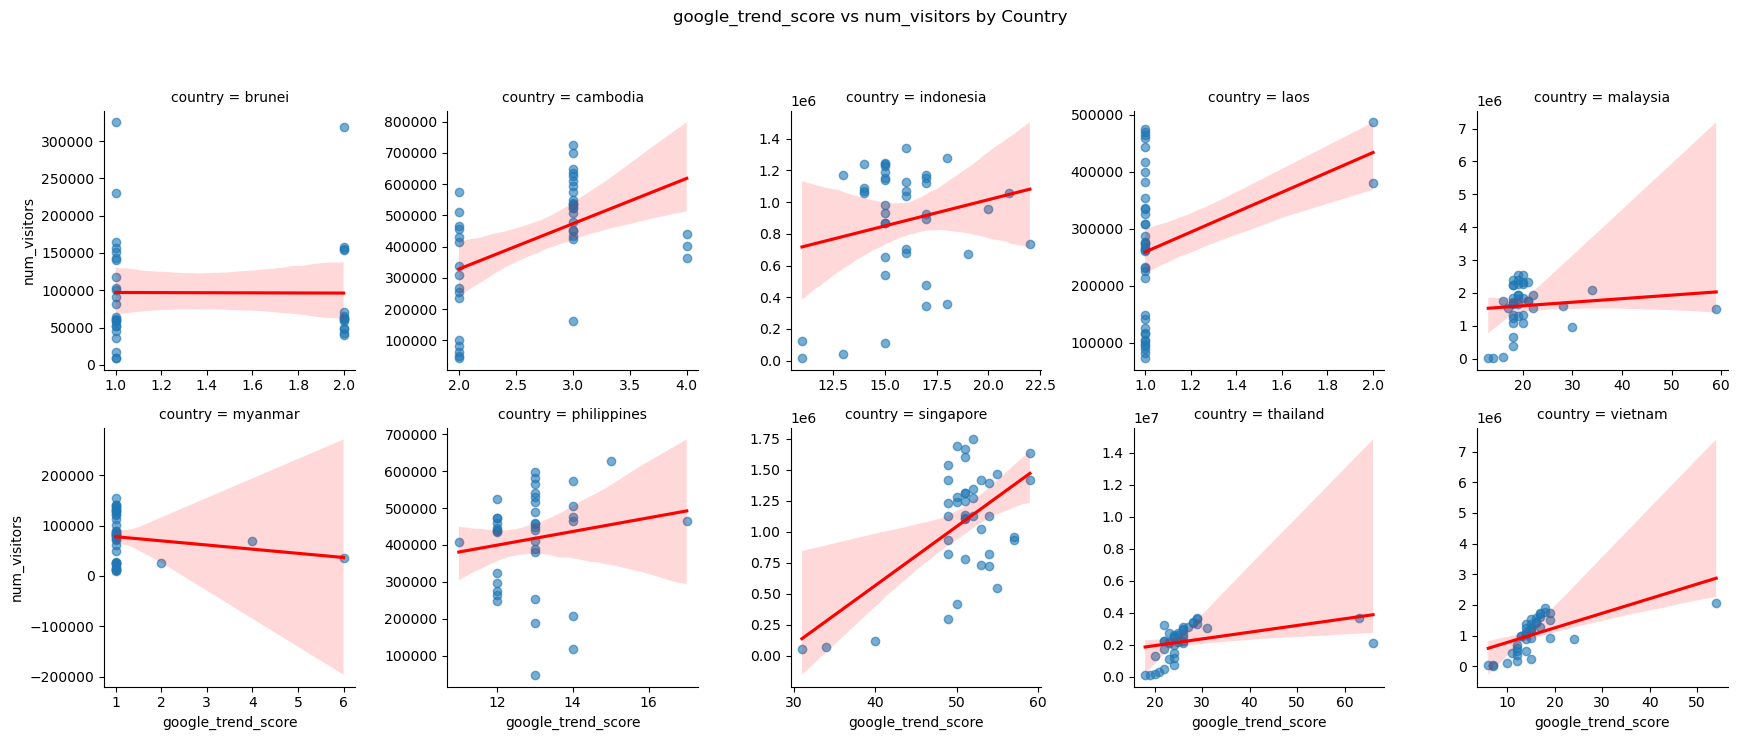

In [172]:
num_cols = processed_df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols.remove('num_visitors')

for feat in num_cols:
    g = sns.FacetGrid(processed_df, col='country', col_wrap=5,
                      sharex=False, sharey=False, height=3.5)
    # use regplot instead of scatterplot → adds best‐fit line
    g.map(sns.regplot, feat, 'num_visitors',
          scatter_kws={'alpha':0.6},    # scatter style
          line_kws={'color':'red'})     # line style
    g.fig.suptitle(f'{feat} vs num_visitors by Country', y=1.05)
    plt.tight_layout()
    plt.show()




In [128]:
final_df = pd.read_csv("final_df.csv")
final_df = pd.DataFrame(final_df)
final_df = final_df.drop(columns=['reddit_under-performing', 'reddit_normal', 
                                  'reddit_outperforming',
                                  'ig_under-performing', 'ig_normal',
                                  'ig_outperforming','reddit_sentiment_z',
                                  'ig_sentiment_z',
                                  'is_holiday'])

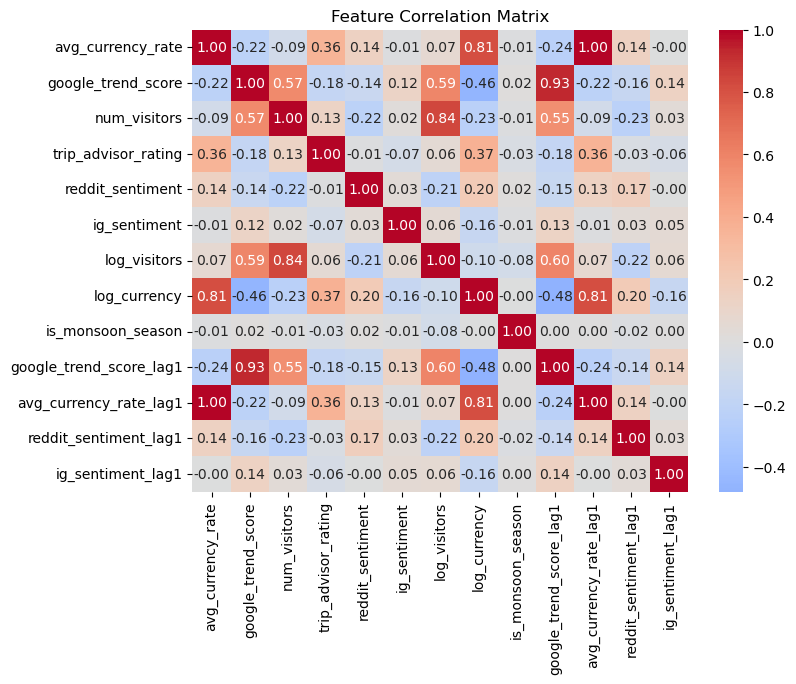

In [130]:
num_cols = final_df.select_dtypes(include=['int64','float64']).columns.tolist()
corr = final_df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

We created lagged features from 1-month to half-year and performed single regression to see which lag window captures the trends the best. 

In [202]:
df = processed_df.copy()
df = df.sort_values(['country', 'month_year'])

base_cols = [
    'ig_sentiment',
    'reddit_sentiment_z',
    'trip_advisor_rating',
    'log_avg_currency_rate',
    'google_trend_score'
]
lags = [2, 3, 4, 5, 6]

for col in base_cols:
    for lag in lags:
        df[f'{col}_lag{lag}'] = (
            df
              .groupby('country')[col]
              .shift(lag)
        )

df.filter(like='_lag').head()

,ig_sentiment_lag2,ig_sentiment_lag3,ig_sentiment_lag4,ig_sentiment_lag5,ig_sentiment_lag6,reddit_sentiment_z_lag2,reddit_sentiment_z_lag3,reddit_sentiment_z_lag4,reddit_sentiment_z_lag5,reddit_sentiment_z_lag6,...,log_avg_currency_rate_lag2,log_avg_currency_rate_lag3,log_avg_currency_rate_lag4,log_avg_currency_rate_lag5,log_avg_currency_rate_lag6,google_trend_score_lag2,google_trend_score_lag3,google_trend_score_lag4,google_trend_score_lag5,google_trend_score_lag6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.741684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.853635,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,0.709663,0.741684,NaN,NaN,NaN,1.117336,NaN,NaN,NaN,NaN,...,0.858854,0.853635,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
4,0.937762,0.709663,0.741684,NaN,NaN,NaN,1.117336,NaN,NaN,NaN,...,0.860752,0.858854,0.853635,NaN,NaN,1.0,1.0,1.0,NaN,NaN


In [ ]:
lags = [f'ig_sentiment_lag{i}' for i in range(1, 7)]
results = []

scaler = StandardScaler()
for country in df['country'].unique():
    sub = df[df['country'] == country][['num_visitors'] + lags].dropna()
    if len(sub) < 5:
        # skip if too few rows
        continue

    X = scaler.fit_transform(sub[lags])
    y = sub['num_visitors'].values

    model = LinearRegression().fit(X, y)
    coefs = pd.Series(model.coef_, index=lags)

    # pick the lag with the largest absolute coefficient
    best_lag = coefs.abs().idxmax()
    coef_val = coefs[best_lag]

    results.append((country, best_lag, coef_val))

# print results
for country, lag, coef in results:
    print(f"{country}: best predictor = {lag} (coefficient = {coef:.3f})")


Brunei: best predictor = ig_sentiment_lag1 (coefficient = 39621.135)
Cambodia: best predictor = ig_sentiment_lag1 (coefficient = -31550.476)
Indonesia: best predictor = ig_sentiment_lag5 (coefficient = -32306.641)
Laos: best predictor = ig_sentiment_lag1 (coefficient = -40430.529)
Malaysia: best predictor = ig_sentiment_lag1 (coefficient = 44548.331)
Myanmar: best predictor = ig_sentiment_lag1 (coefficient = -7141.056)
Philippines: best predictor = ig_sentiment_lag4 (coefficient = 26230.468)
Singapore: best predictor = ig_sentiment_lag1 (coefficient = -50604.065)
Thailand: best predictor = ig_sentiment_lag6 (coefficient = 340883.798)
Vietnam: best predictor = ig_sentiment_lag1 (coefficient = 123078.949)


The results show that for most countries, the best lag window is 1 month. Hence we lagged the sentiments by 1 month for all countries for simplicity.

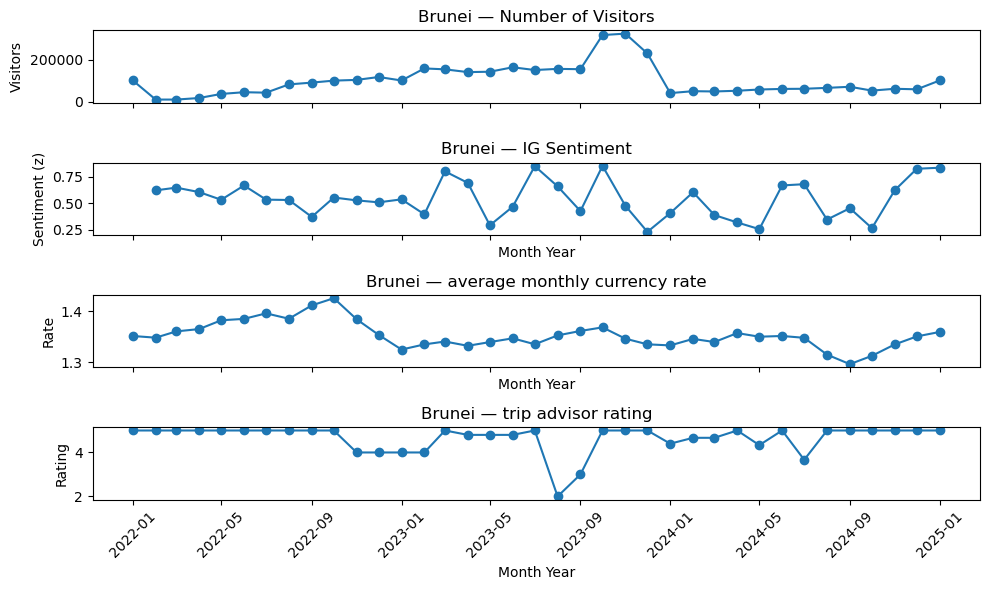

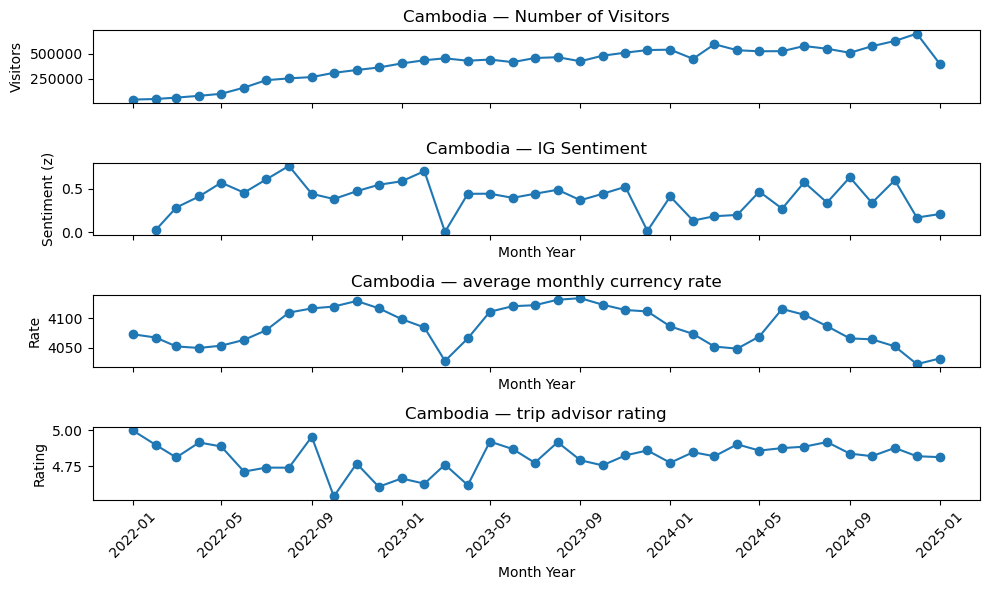

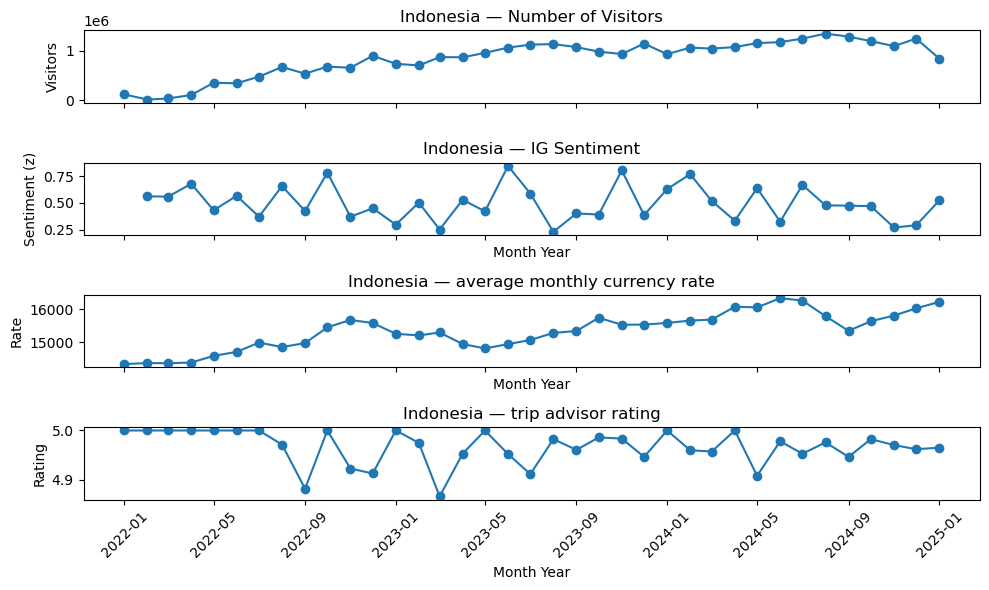

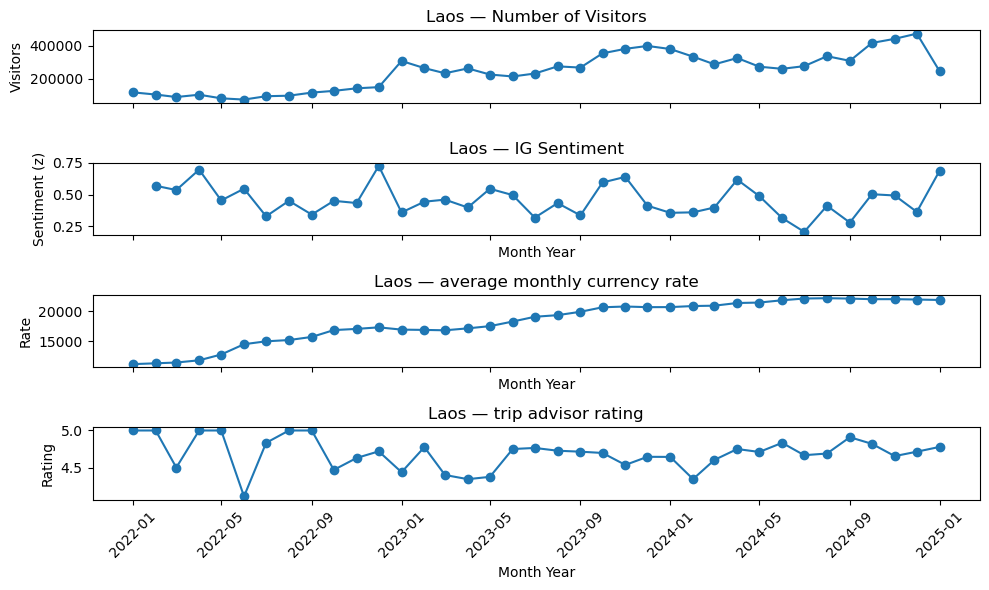

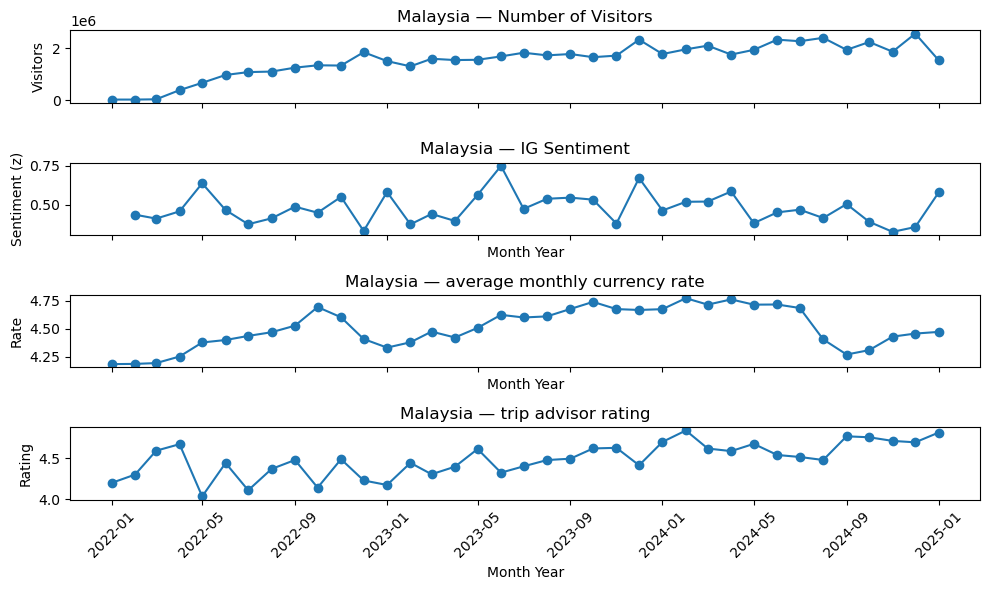

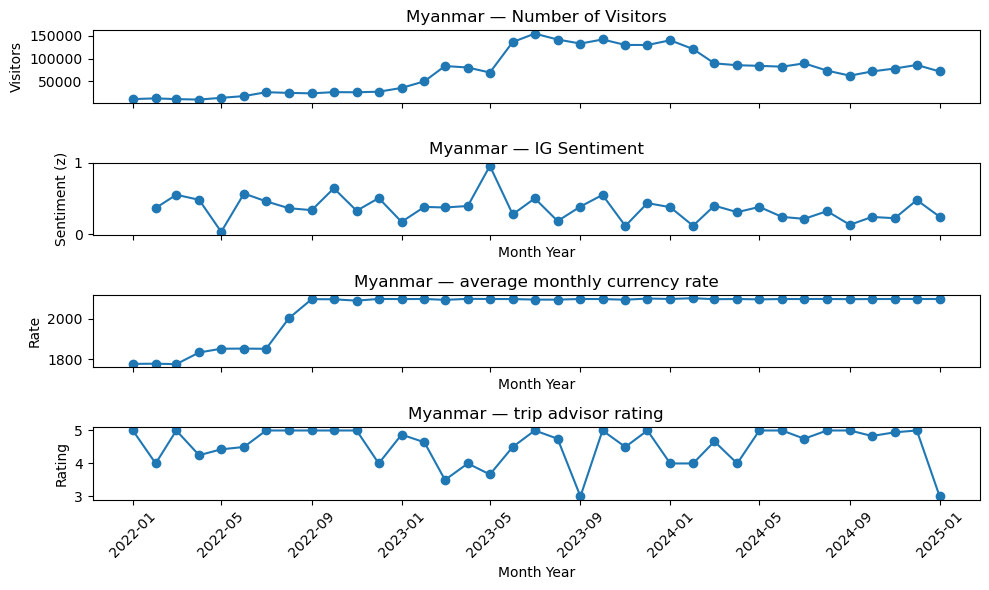

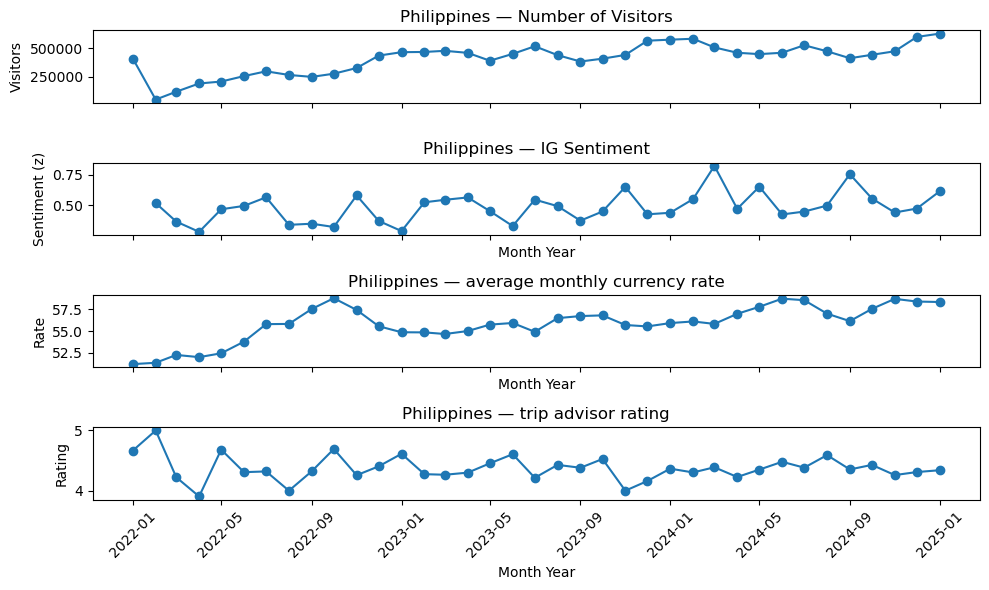

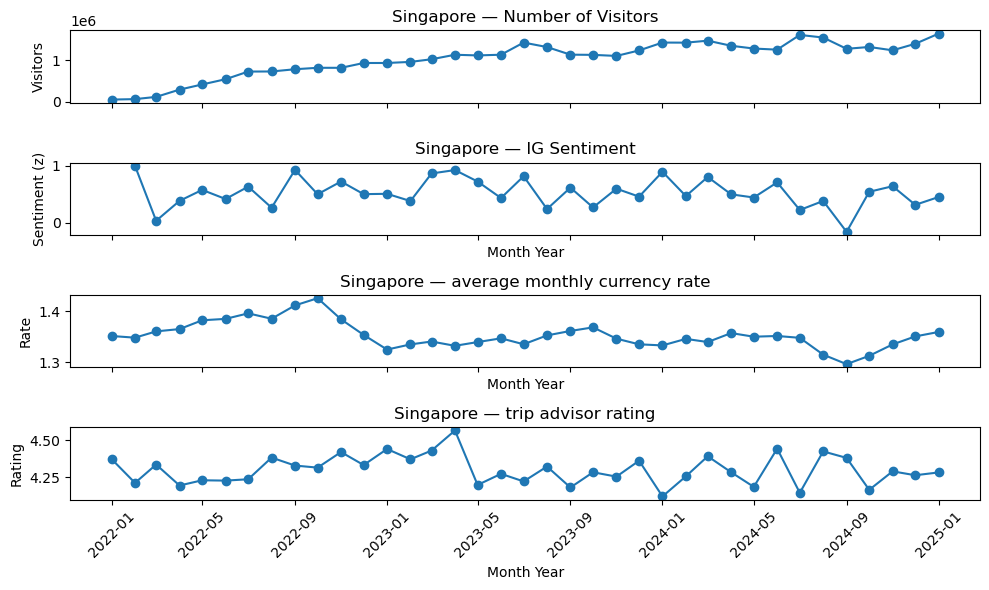

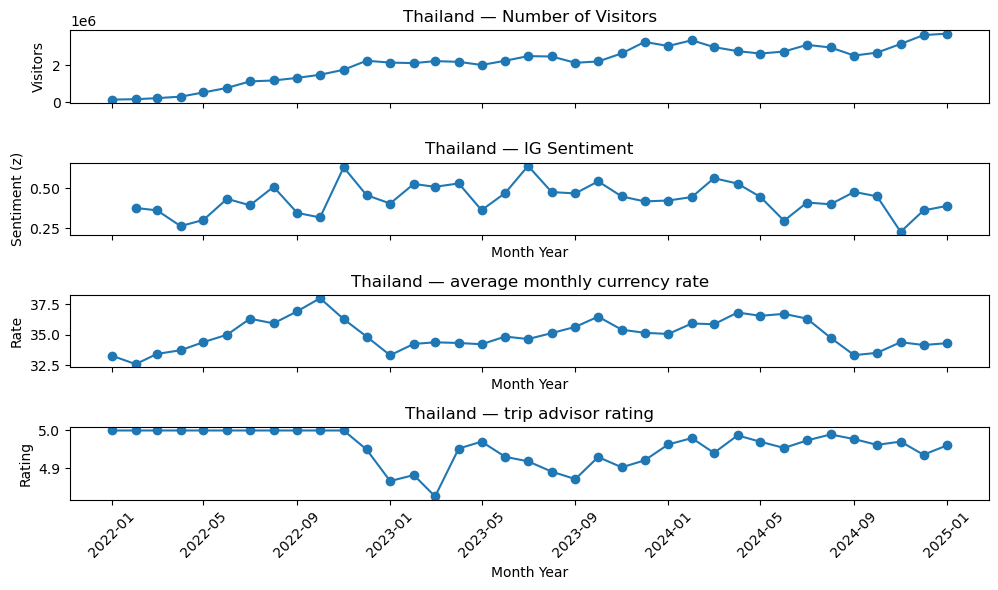

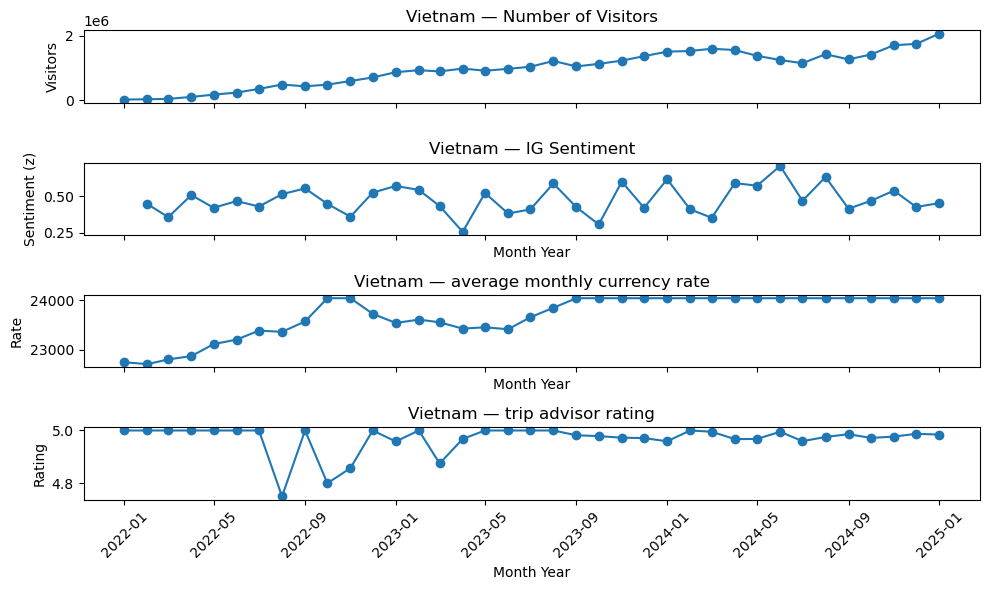

In [ ]:
for country, df_c in final_df.groupby('country'):
    df_c = df_c.sort_values('month_year')
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(
        nrows=4, ncols=1, 
        figsize=(10, 6), 
        sharex=True
    )
    
    # 1. num_visitors
    ax1.plot(df_c['month_year'], df_c['num_visitors'], marker='o')
    ax1.set_title(f'{country} — Number of Visitors')
    ax1.set_ylabel('Visitors')
    
    # 2. ig_sentiment_z
    ax2.plot(df_c['month_year'], df_c['ig_sentiment_lag1'], marker='o')
    ax2.set_title(f'{country} — IG Sentiment')
    ax2.set_ylabel('Sentiment (z)')
    ax2.set_xlabel('Month Year')

    # 3. 'avg_currency_rate
    ax3.plot(df_c['month_year'], df_c['avg_currency_rate'], marker='o')
    ax3.set_title(f'{country} — average monthly currency rate')
    ax3.set_ylabel('Rate')
    ax3.set_xlabel('Month Year')

    # 4. trip_advisor_rating'
    ax4.plot(df_c['month_year'], df_c['trip_advisor_rating'], marker='o')
    ax4.set_title(f'{country} — trip advisor rating')
    ax4.set_ylabel('Rating')
    ax4.set_xlabel('Month Year')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


This shows that there's some sort of periodic trend alignment between num_visitors and independent variables.

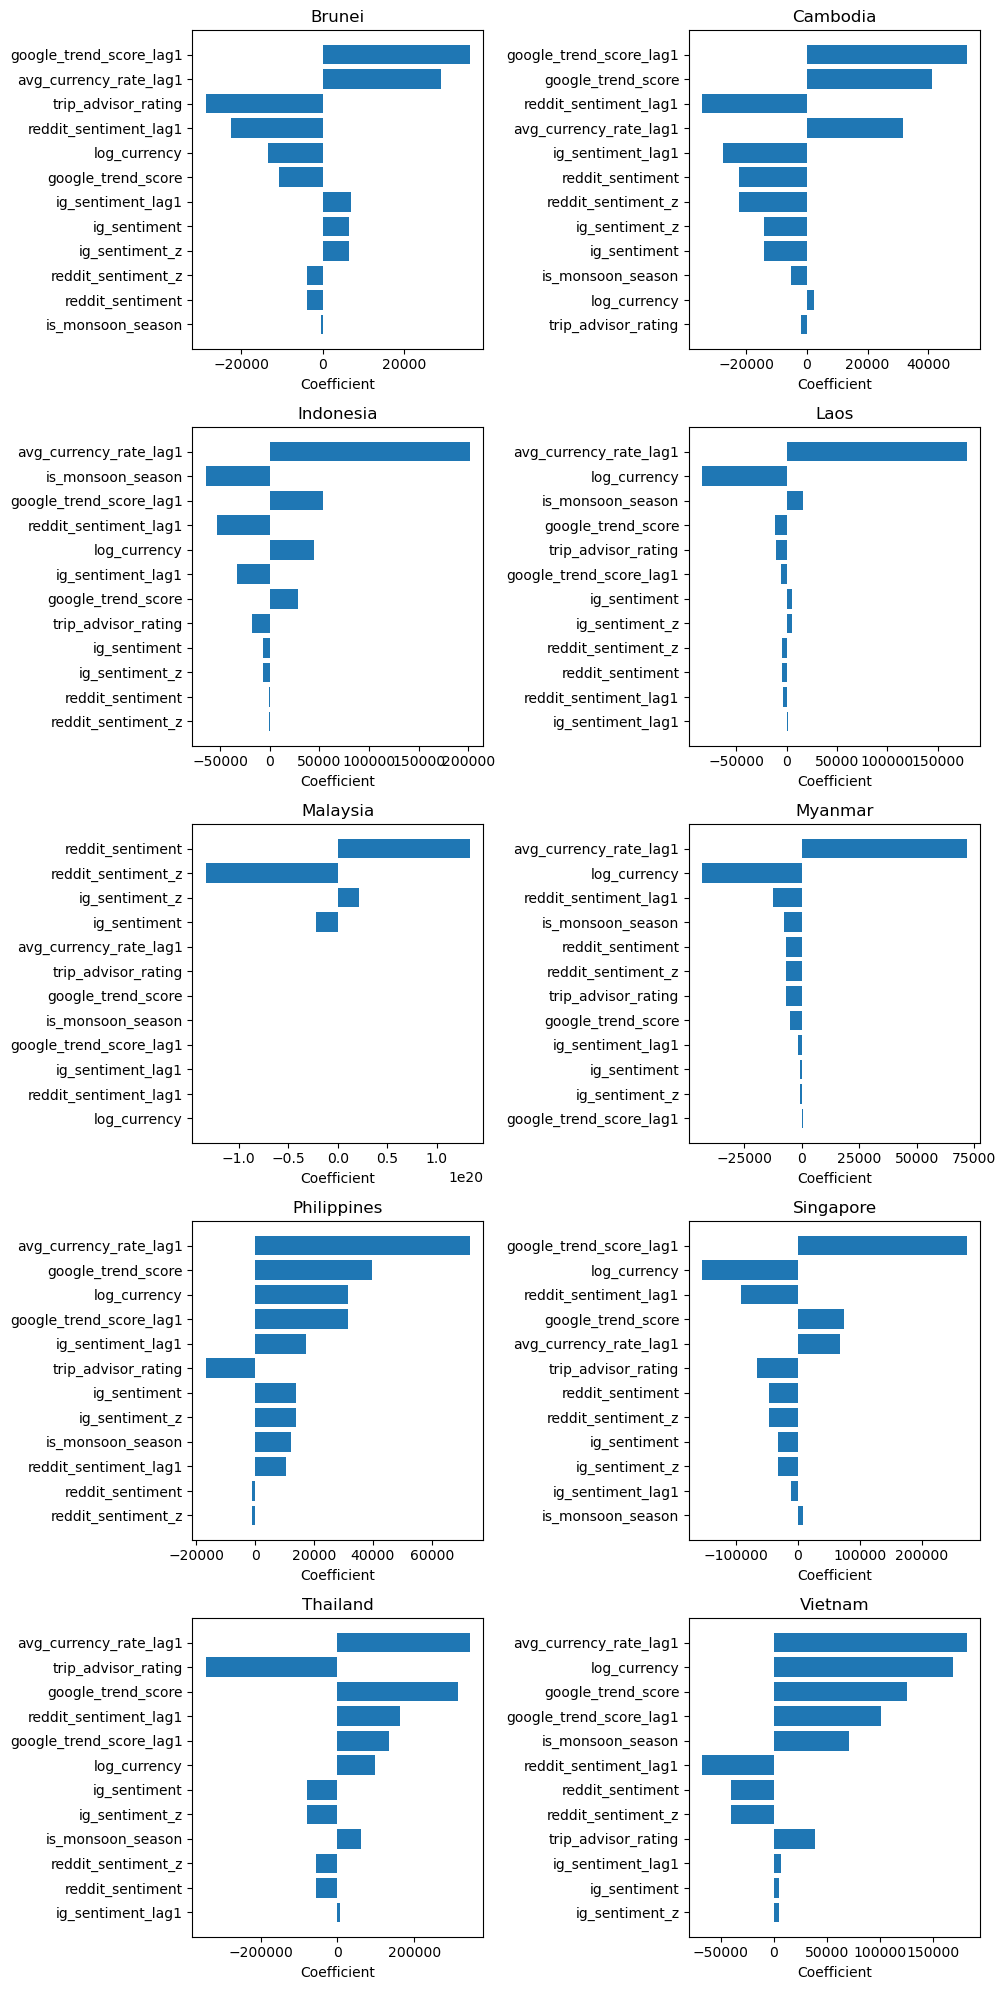

In [191]:
df = final_df.copy().drop(columns=['avg_currency_rate','log_visitors'], errors='ignore')
num_feats = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_feats.remove('num_visitors')
df = df.dropna(subset=['num_visitors'] + num_feats)
countries = df['country'].unique()
n_c = len(countries)
n_cols = 2 
n_rows = math.ceil(n_c / n_cols)

fig, axes = plt.subplots(n_rows, n_cols,
                         figsize=(n_cols*5, n_rows*4),
                         sharex=False, sharey=False)
axes = axes.flatten()

scaler = StandardScaler()
for ax, country in zip(axes, countries):
    sub = df[df['country'] == country]
    X = sub[num_feats]
    y = sub['num_visitors']

    Xs = scaler.fit_transform(X)
    coefs = pd.Series(LinearRegression().fit(Xs, y).coef_, index=num_feats)
    coefs = coefs.reindex(coefs.abs().sort_values(ascending=False).index)

    ax.barh(coefs.index, coefs.values)
    ax.set_title(country)
    ax.invert_yaxis()
    ax.set_xlabel('Coefficient')
    
for ax in axes[n_c:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


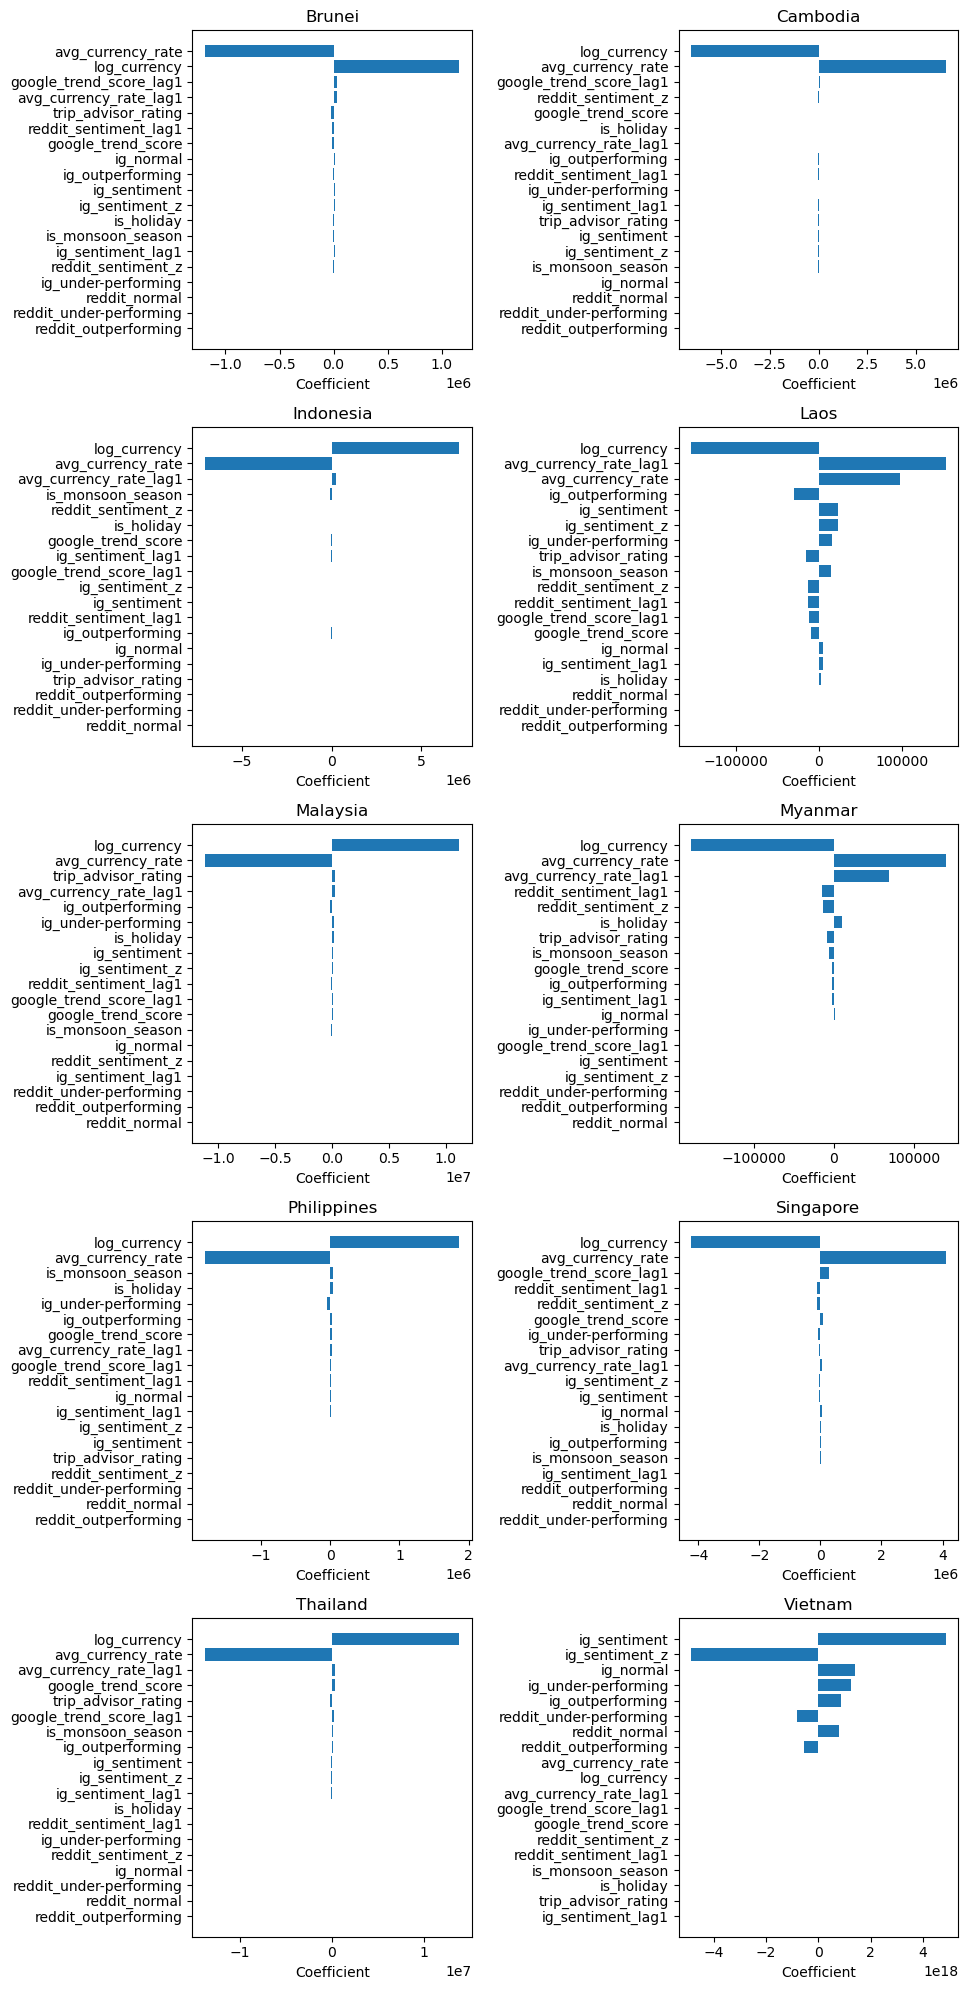

In [48]:
df = final_df.copy().drop(columns=['reddit_sentiment','log_visitors'], errors='ignore')
num_feats = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_feats.remove('num_visitors')
df = df.dropna(subset=['num_visitors'] + num_feats)
countries = df['country'].unique()
n_c = len(countries)
n_cols = 2 
n_rows = math.ceil(n_c / n_cols)

fig, axes = plt.subplots(n_rows, n_cols,
                         figsize=(n_cols*5, n_rows*4),
                         sharex=False, sharey=False)
axes = axes.flatten()

scaler = StandardScaler()
for ax, country in zip(axes, countries):
    sub = df[df['country'] == country]
    X = sub[num_feats]
    y = sub['num_visitors']

    Xs = scaler.fit_transform(X)
    coefs = pd.Series(LinearRegression().fit(Xs, y).coef_, index=num_feats)
    coefs = coefs.reindex(coefs.abs().sort_values(ascending=False).index)

    ax.barh(coefs.index, coefs.values)
    ax.set_title(country)
    ax.invert_yaxis()
    ax.set_xlabel('Coefficient')
    
for ax in axes[n_c:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

## End